In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_SAMPLES = 100

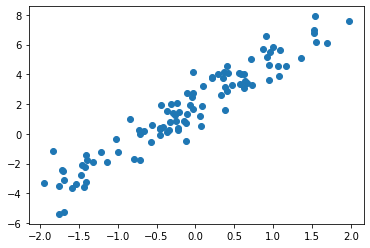

In [6]:
# 初始化随机数据
X = tf.random.normal(shape=[NUM_SAMPLES, 1]).numpy()
noise = tf.random.normal(shape=[NUM_SAMPLES, 1]).numpy()
y = X * TRUE_W + TRUE_b + noise  # 添加噪声

plt.scatter(X, y)

In [9]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.random.uniform([1]))  # 随机初始化参数
        self.b = tf.Variable(tf.random.uniform([1]))

    def __call__(self, x):
        return self.W * x + self.b  # w*x + b

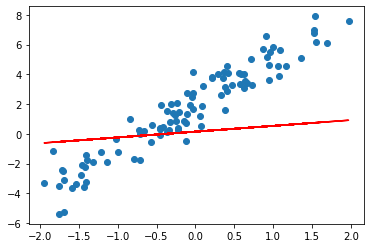

In [10]:
model = Model()  # 实例化模型

plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [11]:
def loss_fn(model, x, y):
    y_ = model(x)
    return tf.reduce_mean(tf.square(y_ - y))

In [13]:
EPOCHS = 10
LEARNING_RATE = 0.1

for epoch in range(EPOCHS):  # 迭代次数
    with tf.GradientTape() as tape:  # 追踪梯度
        loss = loss_fn(model, X, y)  # 计算损失
    dW, db = tape.gradient(loss, [model.W, model.b])  # 计算梯度
    model.W.assign_sub(LEARNING_RATE * dW)  # 更新梯度
    model.b.assign_sub(LEARNING_RATE * db)
    # 输出计算过程
    print('Epoch [{}/{}], loss [{:.3f}], W/b [{:.3f}/{:.3f}]'.format(epoch+1, EPOCHS, loss,
                                                                     float(model.W.numpy()),
                                                                     float(model.b.numpy())))

Epoch [1/10], loss [1.076], W/b [2.680/1.714]
Epoch [2/10], loss [1.005], W/b [2.741/1.755]
Epoch [3/10], loss [0.955], W/b [2.792/1.791]
Epoch [4/10], loss [0.920], W/b [2.834/1.820]
Epoch [5/10], loss [0.895], W/b [2.870/1.844]
Epoch [6/10], loss [0.878], W/b [2.900/1.865]
Epoch [7/10], loss [0.866], W/b [2.924/1.882]
Epoch [8/10], loss [0.858], W/b [2.945/1.896]
Epoch [9/10], loss [0.852], W/b [2.963/1.908]
Epoch [10/10], loss [0.848], W/b [2.977/1.918]


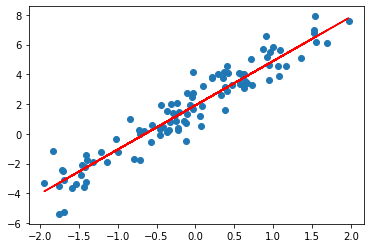

In [14]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [15]:
model = tf.keras.layers.Dense(units=1)  # 实例化线性层

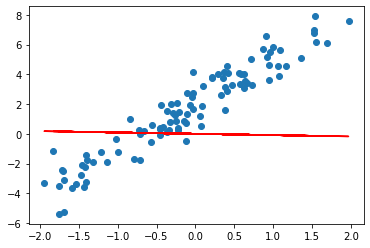

In [16]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [17]:
EPOCHS = 10
LEARNING_RATE = 0.002
for epoch in range(EPOCHS):  # 迭代次数
    with tf.GradientTape() as tape:  # 追踪梯度
        y_ = model(X)
        loss = tf.reduce_sum(tf.keras.losses.mean_squared_error(y, y_))  # 计算损失

    grads = tape.gradient(loss, model.variables)  # 计算梯度
    optimizer = tf.keras.optimizers.SGD(LEARNING_RATE)  # 随机梯度下降
    optimizer.apply_gradients(zip(grads, model.variables))  # 更新梯度

    print('Epoch [{}/{}], loss [{:.3f}]'.format(epoch+1, EPOCHS, loss))

Epoch [1/10], loss [1210.833]
Epoch [2/10], loss [592.566]
Epoch [3/10], loss [313.547]
Epoch [4/10], loss [187.589]
Epoch [5/10], loss [130.716]
Epoch [6/10], loss [105.031]
Epoch [7/10], loss [93.431]
Epoch [8/10], loss [88.192]
Epoch [9/10], loss [85.825]
Epoch [10/10], loss [84.756]


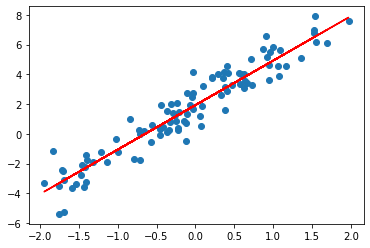

In [18]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()  # 查看模型结构

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='sgd', loss='mse')
model.fit(X, y, steps_per_epoch=100)

Train on 100 samples
100/100 [==============================] - 0s 3ms/sample - loss: 2.7017


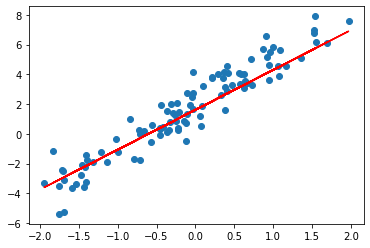

In [24]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')